In [8]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [1]:
#import dask.dataframe as ddf
import dask.distributed as dds
from dask import bag as db
import time
import random
import numpy as np

In [2]:
cluster = dds.LocalCluster()
client = dds.Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:50024 Dashboard: http://127.0.0.1:8787,Cluster Workers: 4 Cores: 4 Memory: 8.49 GB


In [12]:
cluster.close()
client.close()

In [3]:
data = list(np.random.randint(0,100,size=(1000)))

In [4]:
def funct(x):
    time.sleep(0.01)
    return x*2

# Sequential processing

In [5]:
%%time
res_seq=[]
for item, i in zip (data, range(len(data))):
    res_seq.append(funct(item))
    print('%d/%d'%(i,len(data)),end='\r')

Wall time: 16.6 s


# Distributed Parallel processing

In [6]:
bag = db.from_sequence(data)
res_distr_graph = bag.map(funct)

In [7]:
%%time 
res_distr = res_distr_graph.compute()

Wall time: 4.65 s


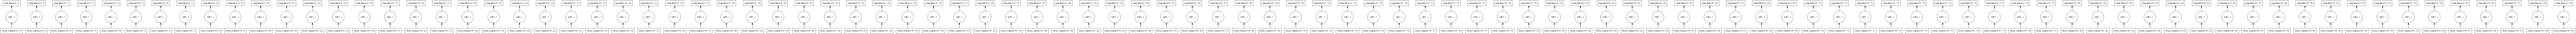

In [9]:
res_distr_graph.visualize()

In [79]:
res_filter = bag.filter(predicate=lambda x: funct(x)%3==2)

In [81]:
%%time
res_filter.compute()

Wall time: 4.62 s


[16,
 88,
 85,
 1,
 1,
 1,
 43,
 55,
 82,
 97,
 1,
 46,
 76,
 76,
 94,
 43,
 55,
 58,
 37,
 1,
 58,
 34,
 58,
 49,
 28,
 1,
 52,
 19,
 64,
 34,
 70,
 28,
 49,
 43,
 73,
 76,
 79,
 22,
 43,
 28,
 1,
 64,
 13,
 79,
 88,
 16,
 40,
 88,
 82,
 97,
 52,
 22,
 94,
 85,
 73,
 64,
 4,
 4,
 52,
 43,
 76,
 22,
 64,
 10,
 58,
 34,
 58,
 40,
 28,
 28,
 76,
 25,
 49,
 58,
 97,
 58,
 79,
 58,
 91,
 13,
 67,
 61,
 13,
 73,
 7,
 85,
 16,
 34,
 79,
 73,
 64,
 64,
 58,
 22,
 79,
 76,
 13,
 85,
 43,
 94,
 70,
 64,
 58,
 34,
 52,
 4,
 97,
 46,
 97,
 43,
 34,
 25,
 73,
 49,
 55,
 10,
 91,
 82,
 88,
 85,
 55,
 1,
 13,
 37,
 61,
 43,
 28,
 34,
 19,
 58,
 49,
 22,
 4,
 67,
 73,
 13,
 49,
 37,
 88,
 91,
 97,
 34,
 91,
 13,
 43,
 28,
 34,
 25,
 31,
 31,
 28,
 52,
 1,
 34,
 76,
 13,
 79,
 58,
 16,
 88,
 4,
 7,
 61,
 22,
 49,
 97,
 55,
 19,
 46,
 85,
 58,
 55,
 67,
 40,
 64,
 85,
 7,
 37,
 25,
 31,
 25,
 4,
 55,
 70,
 10,
 49,
 31,
 40,
 49,
 82,
 40,
 40,
 85,
 82,
 79,
 34,
 37,
 73,
 37,
 28,
 58,
 22,
 10,
 94

tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D115ECBF60> exception was never retrieved: Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\client.py", line 1287, in wait
    raise AllExit()
distributed.client.AllExit
tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D115ECBE10> exception was never retrieved: Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\client.py", line 1287, in wait
    raise AllExit()
distributed.client.AllExit
tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D115ECBCC0> exception was never retrieved: Traceback (most

tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D1159EB4E0> exception was never retrieved: Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\client.py", line 1287, in wait
    raise AllExit()
distributed.client.AllExit
tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D1159EB390> exception was never retrieved: Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\client.py", line 1287, in wait
    raise AllExit()
distributed.client.AllExit
tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D1159EB240> exception was never retrieved: Traceback (most

tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D1159EF8D0> exception was never retrieved: Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\client.py", line 1287, in wait
    raise AllExit()
distributed.client.AllExit
tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D1159EF780> exception was never retrieved: Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\client.py", line 1287, in wait
    raise AllExit()
distributed.client.AllExit
tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D1159EF630> exception was never retrieved: Traceback (most

tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D1159B5E10> exception was never retrieved: Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\client.py", line 1287, in wait
    raise AllExit()
distributed.client.AllExit
tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D1159B5CC0> exception was never retrieved: Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\client.py", line 1287, in wait
    raise AllExit()
distributed.client.AllExit
tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D1159B5B70> exception was never retrieved: Traceback (most

tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D115997240> exception was never retrieved: Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\client.py", line 1287, in wait
    raise AllExit()
distributed.client.AllExit
tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D1159970F0> exception was never retrieved: Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\client.py", line 1287, in wait
    raise AllExit()
distributed.client.AllExit
tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x000001D115996F60> exception was never retrieved: Traceback (most

In [ ]:
client